# Autoencoders

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101)
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [8]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [9]:
from mpl_toolkits.mplot3d import Axes3D

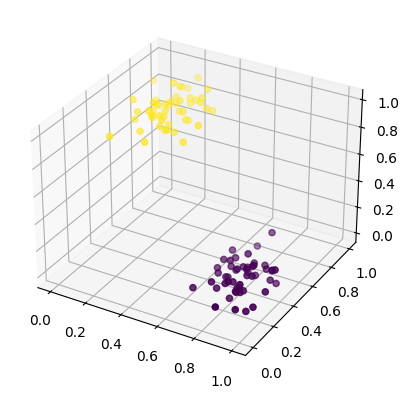

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data_x, data_y, data_z, c=data[1])

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [14]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs
learning_rate = 0.01

In [15]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [16]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

Instructions for updating:
Please use `layer.__call__` method instead.


In [17]:
loss = tf.reduce_mean(tf.square(outputs - X))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [18]:
num_steps = 1000

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    for iteration in range(num_steps):
        session.run(train, feed_dict={X:scaled_data})
    
    output_2d = hidden.eval(feed_dict={X:scaled_data})

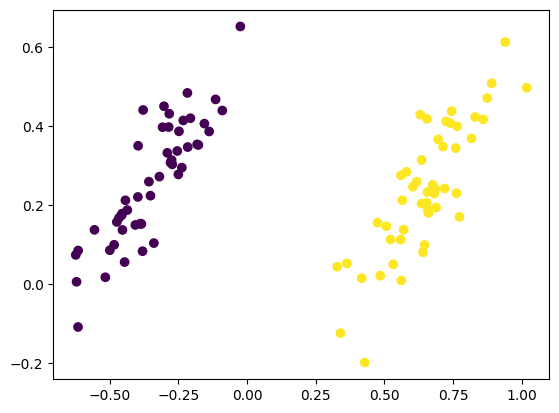

In [21]:
plt.scatter(output_2d[:,0], output_2d[:,1], c=data[1])

### Stacked Autoencoders

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [47]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets.mnist import load_data

In [61]:
(X_train, y_train), (X_test, y_test) = load_data()

In [64]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [34]:
tf.reset_default_graph()

In [36]:
num_inputs = 7
neurons_hidden_1 = 392
neurons_hidden_2 = 196
neurons_hidden_3 = neurons_hidden_1
num_outputs = num_inputs

learning_rate = 0.01
act_fn = tf.nn.relu

In [37]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [38]:
initializer = tf.variance_scaling_initializer()

In [39]:
w1 = tf.Variable(initializer([num_inputs, neurons_hidden_1]), dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hidden_1, neurons_hidden_2]), dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hidden_2, neurons_hidden_3]), dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hidden_3, num_outputs]), dtype=tf.float32)

In [40]:
b1 = tf.Variable(tf.zeros(neurons_hidden_1))
b2 = tf.Variable(tf.zeros(neurons_hidden_2))
b3 = tf.Variable(tf.zeros(neurons_hidden_3))
b4 = tf.Variable(tf.zeros(num_outputs))

In [41]:
hidden_layer_1 = act_fn(tf.matmul(X,w1)+b1)
hidden_layer_2 = act_fn(tf.matmul(hidden_layer_1,w2)+b2)
hidden_layer_3 = act_fn(tf.matmul(hidden_layer_2,w3)+b3)
output_layer = act_fn(tf.matmul(hidden_layer_3,w4)+b4)

In [42]:
loss = tf.reduce_mean(tf.square(output_layer - X))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [44]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [65]:
num_epochs = 5
batch_size = 150

# with tf.Session() as session:
#     session.run(init)
    
#     for epoch in range(num_epochs):
#         num_batches = X_train.shape[0] // batch_size
       

ModuleNotFoundError: No module named 'tensorflow.examples.tutorials'